In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import sklearn.datasets as datasets

In [3]:
from sklearn.metrics import r2_score#评分模块

In [4]:
np.random.seed(37)

In [5]:
n_train,n_test=50,200

In [6]:
x=np.random.randn(n_train,n_test)
x

array([[-0.05446361,  0.67430807,  0.34664703, ..., -0.26269206,
        -0.17305008, -0.0616228 ],
       [-1.79301217, -0.32583333, -0.21422979, ..., -0.96990685,
        -1.297276  , -0.10844137],
       [-2.04809872,  0.37400931, -0.27024766, ..., -0.08857314,
         0.43833666,  0.68340019],
       ...,
       [-0.91213409, -0.78275588,  0.26149967, ...,  1.34430929,
        -1.0308069 , -1.30925451],
       [ 1.01219341,  1.67471187, -1.38112094, ...,  1.71731434,
         0.23696875,  1.15187187],
       [-1.68565805, -0.85127672, -0.49185303, ..., -0.72555704,
         0.33369825,  0.77013718]])

In [7]:
x.shape

(50, 200)

In [8]:
coef=3*np.random.rand(n_test)

In [9]:
coef.shape

(200,)

In [11]:
inds=np.arange(n_test)
inds

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [12]:
np.random.shuffle(inds)
inds

array([158,  87,   5,  25, 135,  58,  22,  78,  67, 154, 155, 144,  85,
        23, 103,  27, 178, 120, 108, 162, 189, 133, 118,  32,  14, 176,
        51,  36,  41, 183, 187,  44, 137,  66,  46,  99,   2,  86,   6,
        96,  79,  40,  35, 193,  70,   3, 102, 146,  11, 149,  24,  73,
       197, 190, 171, 180, 163, 136, 113,  81,   0,  16,  90, 119,  17,
         9,  13, 169,  74, 150,  75,  98,  89,  95,  49, 106, 128,  37,
        68, 196, 159, 168,  56, 164,   8, 177, 161, 115, 142,  53,  55,
       143,  84,  83,  45,  34, 122, 116,  65, 191, 131,  28,  77, 198,
        76, 112,  60,  71,  15, 194,  82,  72,  31,  43, 126,  26,  42,
        97,   7, 181,  64, 186, 160, 124, 145, 110, 175,  39, 173, 104,
        19, 166,  33,  29, 107,  80, 105,  92,  61, 199,  21,  38,  62,
        12, 165,  47,  52, 129, 147, 114, 121, 140,  94,  48,  18, 130,
        63, 188, 152, 139, 125,  69, 170, 117, 174, 127, 111, 156, 141,
        93, 195,   4, 109, 179, 153,  88,  10, 167, 184,  20, 15

In [13]:
coef[inds[10:]]=0

In [14]:
coef

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.35445843, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.7723103 , 0.        , 0.        ,
       1.2453664 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.27346596, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.4201022 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
y=np.dot(x,coef)
y

array([ 6.21095442,  4.23693336,  0.10293619,  1.56362128, -7.8378691 ,
       -1.52431642, -4.1001602 , -5.58697845, -0.20637187, -2.65689264,
        1.49253053, -1.79294284,  5.20828341,  3.8224029 , -3.17446999,
       15.10563545, -6.33423838, -0.35918891,  2.09685268, -5.3816107 ,
       17.64139787, -6.85372557, -0.3061345 , -3.49021911, -0.02357394,
        4.39434469,  5.54336187,  0.3260415 ,  1.82041107, -2.98606413,
        4.32317127, -1.90812166, -2.35305032,  3.7302605 , -1.38017934,
        1.0513431 ,  3.14101059, -4.37580161, -5.78976112, -2.53855989,
        5.34976666, -3.25220581,  1.54441638,  3.96849021,  4.31199164,
       -1.22341752,  1.43783355,  0.93332499,  1.99658759, -1.12568126])

In [16]:
y+=0.01*np.random.normal((n_train))
y

array([ 6.70656107,  4.73254   ,  0.59854284,  2.05922793, -7.34226246,
       -1.02870977, -3.60455355, -5.0913718 ,  0.28923478, -2.16128599,
        1.98813718, -1.2973362 ,  5.70389005,  4.31800955, -2.67886335,
       15.6012421 , -5.83863174,  0.13641774,  2.59245933, -4.88600406,
       18.13700452, -6.35811892,  0.18947214, -2.99461246,  0.47203271,
        4.88995134,  6.03896852,  0.82164815,  2.31601772, -2.49045748,
        4.81877791, -1.41251501, -1.85744368,  4.22586715, -0.88457269,
        1.54694975,  3.63661724, -3.88019497, -5.29415448, -2.04295325,
        5.84537331, -2.75659917,  2.04002303,  4.46409686,  4.80759829,
       -0.72781087,  1.93344019,  1.42893163,  2.49219424, -0.63007462])

In [21]:
x_train=x[:int(n_train/2)]
y_train=y[:int(n_train/2)]
x_test=x[int(n_train/2):]
y_test=y[int(n_train/2):]

In [23]:
#线性回归
lrg=LinearRegression()
lrg.fit(x_train,y_train)
ynew_lrg=lrg.predict(x_test)
r2_score(y_test,ynew_lrg)

0.2935335885030733

In [24]:
redge=Ridge()
redge.fit(x_train,y_train)
ynew_redge=redge.predict(x_test)
r2_score(y_test,ynew_redge)

0.3157993292232649

In [25]:
lasso=Lasso()
lasso.fit(x_train,y_train)
ynew_lasso=lasso.predict(x_test)
r2_score(y_test,ynew_lasso)

0.7047546714828101

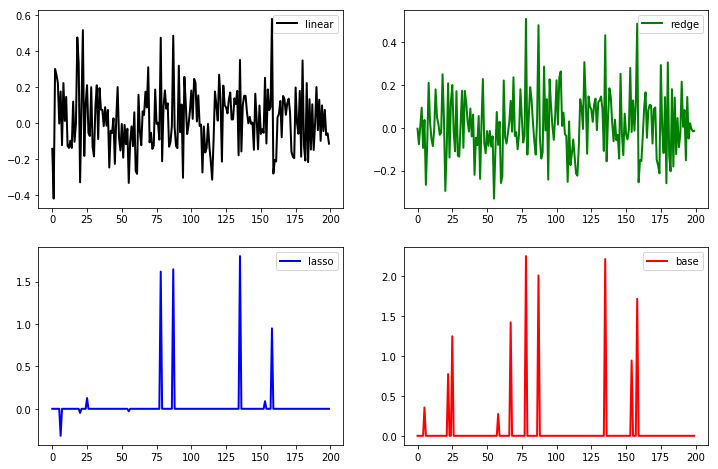

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(lrg.coef_,color="black",lw=2,label="linear")
plt.legend()

plt.subplot(2,2,2)
plt.plot(redge.coef_,color="green",lw=2,label="redge")
plt.legend()

plt.subplot(2,2,3)
plt.plot(lasso.coef_,color="blue",lw=2,label="lasso")
plt.legend()
plt.subplot(2,2,4)
plt.plot(coef,color="red",lw=2,label="base")
plt.legend()